In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
#print(sys.path)
#print(sys.modules['data'])
from src.data.lagrangian_datatools import *
from src.data import statistics as ds
import importlib
from torchvision import transforms
import seaborn as sns
import scienceplots
# style of plots

# use the next line if you want to generate the plots of the report
plt.style.use(['science','nature'])

# modify the next line to get bigger plots
plt.rcParams.update({'figure.dpi': '200'}) #200 for the report
# set the font size for the text of the plots
plt.rcParams.update({'font.size': 14, "legend.fontsize":"small"}) #14 for the report

In [2]:
importlib.reload(ds)

<module 'src.data.statistics' from '/home/maria/Documents/github/multiscale-turbulence/src/data/statistics.py'>

In [2]:
# Loading the data
filename = "../data/velocities.npy"
# set seed in numpy
np.random.seed(42)

In [3]:
d1 = ParticleDataset(npy_filename=filename, root_dir=".")

Dataset is a tensor of shape [N, T, 3] where N the number of samples, T the number of time steps and 3 corresponds to the coordinates x,y,z. In practice, N=300k and T=2000

In [5]:
len(d1)

327680

In [4]:
# one sample
sample_1 = d1[1]
sample_1.shape

(2000, 3)

In [7]:
# velocity of the first dimension of one particle
sample_1[:,0].shape

(2000,)

Velocity trajectory of one datapoint from the dataset, in coordinate x.

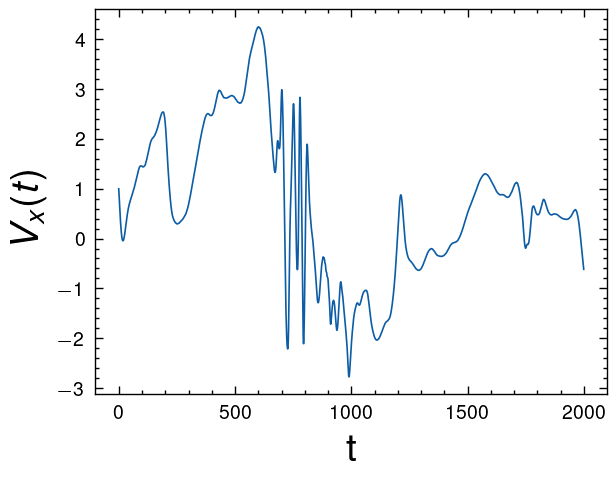

In [5]:
plt.plot(np.arange(2000), sample_1[:,0], linewidth=0.6)
plt.ylabel(r"$V_x(t)$", fontdict={"fontsize": 14})
plt.xlabel("t", fontdict={"fontsize": 14})
# save figure
plt.savefig("../docs/report/figs/one_sample_trajectory.eps", bbox_inches='tight', dpi=200)
plt.show()

Same velocity trajectory, now in 3D

In [7]:
# we have to change some things so the ticks and axis labels are not cut off
plt.rcParams.update({'xtick.major.pad':'-2', 'ytick.major.pad':'-2'})


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


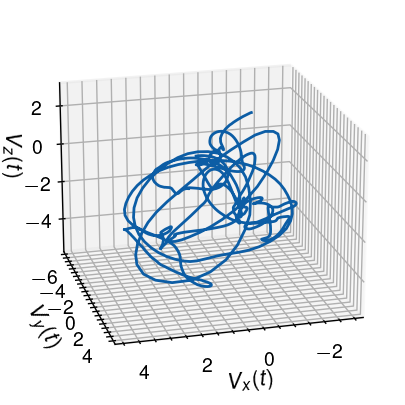

In [8]:
ax = plt.axes(projection='3d')
ax.plot3D(sample_1[:,0], sample_1[:,1], sample_1[:,2])
ax.set_xlabel(r"$V_x(t)$", fontdict={"fontsize": 8})
ax.set_ylabel(r"$V_y(t)$", fontdict={"fontsize": 8})
ax.set_zlabel(r"$V_z(t)$",fontdict={"fontsize": 8})
ax.zaxis.labelpad=-8 # <- change the value here
ax.xaxis.labelpad=-8 # <- change the value here
ax.yaxis.labelpad=-8 # <- change the value here

# solve the problem of the z axis label being cut off
ax.view_init(20, 75)
# plt.tight_layout()
# save figure
plt.savefig("../docs/report/figs/3d-trajectory-sample.eps", bbox_inches='tight', dpi=200)
plt.show()

In [12]:
# reset the values
plt.rcParams.update({'xtick.major.pad':'4', 'ytick.major.pad':'4'})

Acceleration trajectory of one datapoint from the dataset, in coordinate x

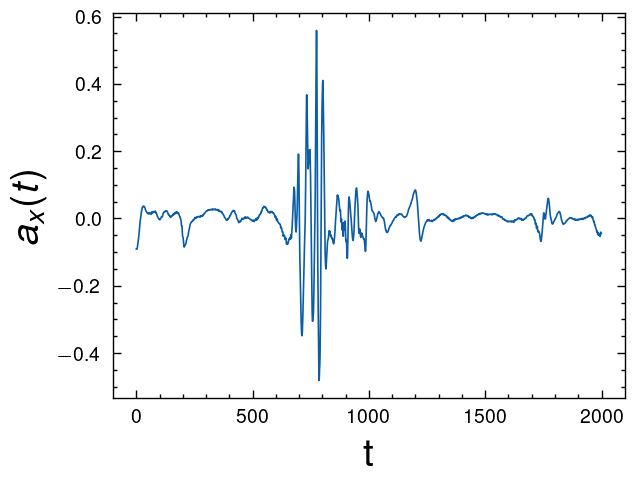

In [13]:
a_x = np.gradient(sample_1[:,0])
plt.plot(np.arange(2000), a_x, linewidth=0.6)
plt.ylabel(r"$a_x(t)$", fontdict={"fontsize": 14})
plt.xlabel("t", fontdict={"fontsize": 14})
# save figure
plt.savefig("../docs/report/figs/one_sample_acceleration.eps", bbox_inches='tight', dpi=200)


several trajectories

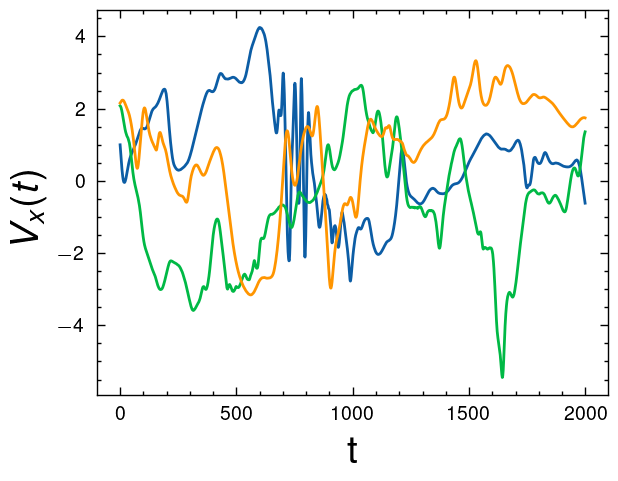

In [14]:
samples = [sample_1, d1[5], d1[20]]
for sample in samples:
    plt.plot(np.arange(2000), sample[:,0])

plt.ylabel(r"$V_x(t)$", fontdict={"fontsize": 14})
plt.xlabel("t", fontdict={"fontsize": 14})
plt.show()

Text(0.5, 0, 't')

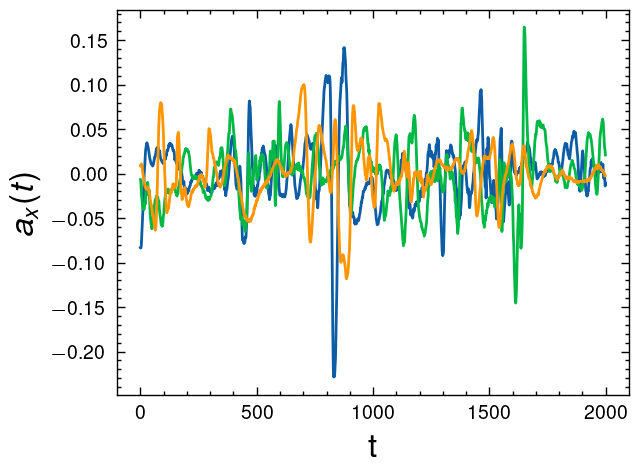

In [11]:
for sample in samples:
    a_x = np.gradient(sample[:,0])
    plt.plot(np.arange(2000), a_x)
plt.ylabel(r"$a_x(t)$", fontdict={"fontsize": 14})
plt.xlabel("t", fontdict={"fontsize": 14})

## Mean and variance - Global statistics

**Using all samples**

In [5]:
del d1
d1 = ParticleDataset(npy_filename=filename, root_dir=".", transform=ToTensor())

In [14]:
std, mean = torch.std_mean(d1[:])
print(std, mean)

tensor(1.7358, dtype=torch.float64) tensor(-0.0003, dtype=torch.float64)


Mean and standard deviation per channel

In [6]:
std, mean = torch.std_mean(d1[:], dim=(0,1))
print(std, mean)

tensor([1.7193, 1.7680, 1.7197], dtype=torch.float64) tensor([-0.0010, -0.0002,  0.0002], dtype=torch.float64)


## The statistics to be measured

**Using less samples**

In [21]:
del d1
d1 = ParticleDataset(npy_filename=filename, root_dir=".")
idx = np.random.randint(0, len(d1), 10000)
stat = ds.StatisticalPhysics(d1[idx])

In [6]:
# tau goes from 1 to 1000
list_taus = np.unique([int(t) for t in np.logspace(0, 3)]).astype(int)
list_n=[2,4,6]

### Lagrangian structures

$$
S_n(\tau) = \left \langle (\delta_{\tau}V)^n \right \rangle
$$

$\tau$ is defined as the range of integers between $10^0$ and $10^3$

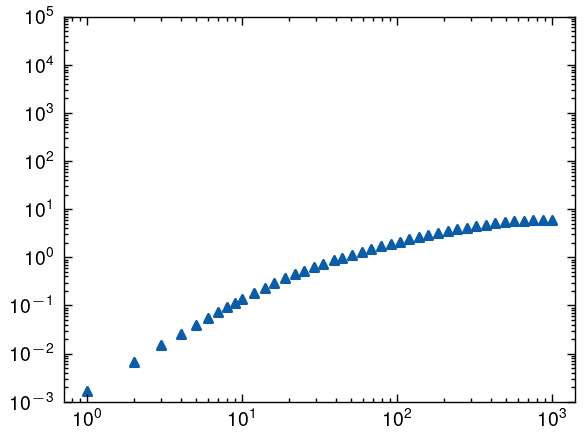

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-4, top=10e4)

stat.plot_lagrangian_structure_function(n=2, coordinate=0, ax=ax)

# set font size for the x and y labels
ax.yaxis.get_label().set_fontsize(14)
ax.xaxis.get_label().set_fontsize(14)
ax.set_yscale("log")
ax.set_xscale("log")
plt.show()

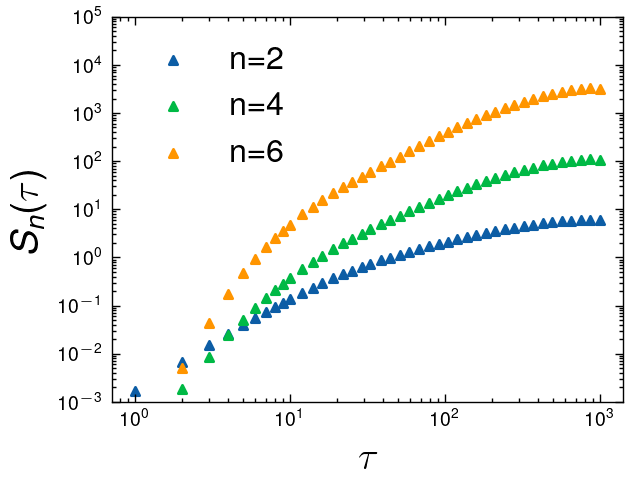

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-4, top=10e4)

stat.plot_several_lagrangian_structure_function(list_n, coordinate=0, ax=ax)
# set font size for the x and y labels
ax.yaxis.get_label().set_fontsize(14)
ax.xaxis.get_label().set_fontsize(14)
# save fig
plt.savefig("../docs/report/figs/structures_original.eps", bbox_inches="tight", dpi=200)

plt.show()

## Flatness

$$
F_n(\tau) = \frac{\left \langle (\delta_{\tau}V)^n \right \rangle}{\left \langle (\delta_{\tau}V)^{n/2} \right \rangle ^2}
$$

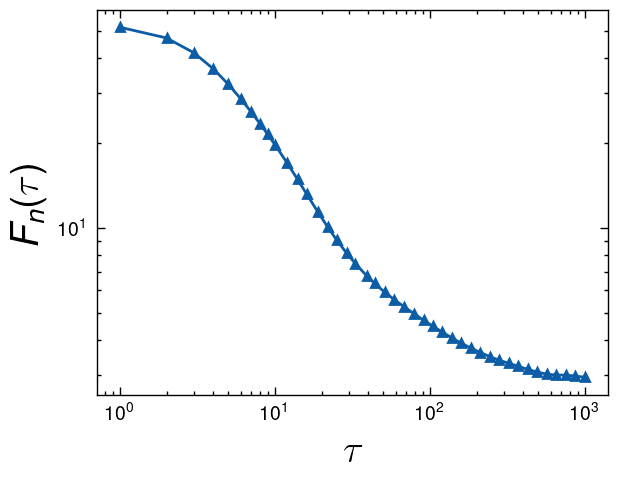

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

stat.plot_flatness_function(4, coordinate=0, ax=ax)

# set font size for the x and y labels
ax.yaxis.get_label().set_fontsize(14)
ax.xaxis.get_label().set_fontsize(14)

plt.show()

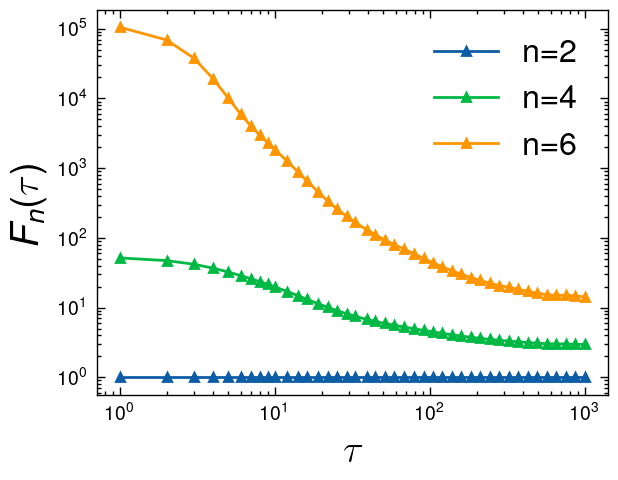

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

stat.plot_several_flatness_function(list_n, coordinate=0, ax=ax)
                                    
# set font size for the x and y labels
ax.yaxis.get_label().set_fontsize(14)
ax.xaxis.get_label().set_fontsize(14)

# save fig
plt.savefig("../docs/report/figs/flatness_original.eps", bbox_inches="tight", dpi=200)
plt.show()

## PDF's

Linear-log plot of the pdf of the velocity at coordinate x, for a given value of $\tau = 100$

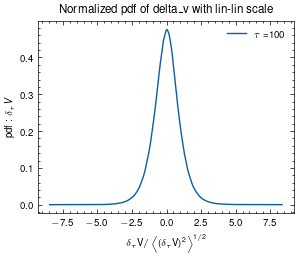

In [9]:
stat.plot_pdf_delta_tau_velocity(100, coordinate=0)

Now we're plotting the pdf at several different values of $\tau$ (it takes some minutes...)

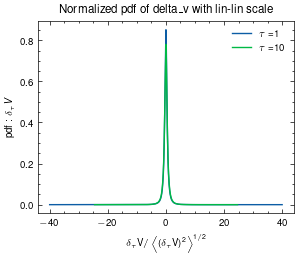

In [15]:
stat.plot_several_tau_delta_velocity([1,10], coordinate=0, y_log=False)

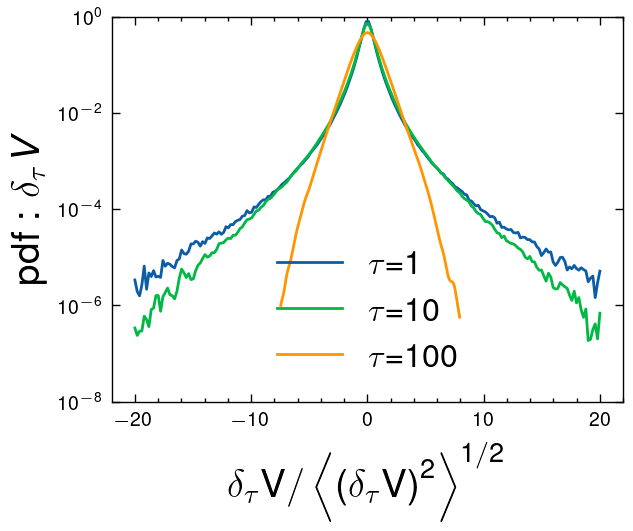

In [37]:
# pdf legacy plot method improved
_, ax = plt.subplots()
ax.set_ylim(bottom=10e-9, top=1)

ax.set_ylabel("pdf : " + r"$\delta_{\tau}V$")
ax.set_xlabel(
    r"$\delta_{\tau} \mathrm{V} /\left\langle\left(\delta_{\tau} \mathrm{V}\right)^{2}\right\rangle^{1 / 2}$")
test_taus = [1,10,100]
for i, tau in enumerate(test_taus):
    norm_delta_tau_velocity = stat.compute_delta_tau_velocity_for_pdf(tau, coordinate=0).flatten()
    sns.kdeplot(
        data=norm_delta_tau_velocity,
        label=r"$\tau$=" + str(tau),
        log_scale=(False, True),
        ax=ax,
        cut=0,
        clip=(-20, 20),
        bw_adjust=1+i*2,
    )
plt.legend()

# set font size for the x and y labels
ax.yaxis.get_label().set_fontsize(14)
ax.xaxis.get_label().set_fontsize(14)

# save fig
plt.savefig("../docs/report/figs/delta_v_pdfs_original.eps", bbox_inches="tight", dpi=200)

plt.show()


PDF of the velocity at coordinate x:

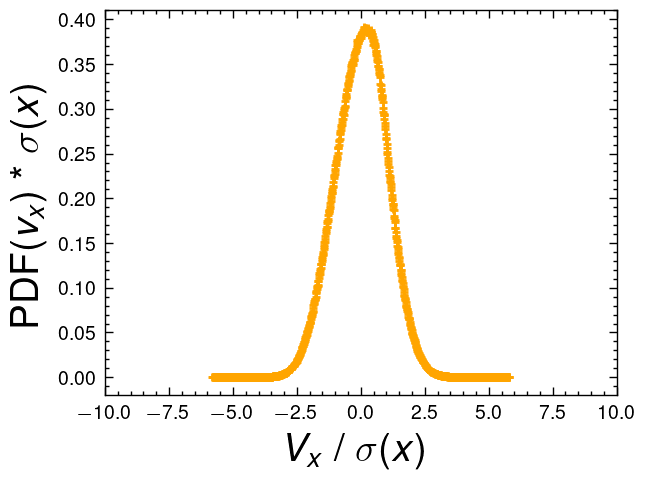

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-10, 10)
stat.plot_vx_norm_pdf(y_log=False, ax=ax)

# set font size for the x and y labels
ax.yaxis.get_label().set_fontsize(14)
ax.xaxis.get_label().set_fontsize(14)

# remove title when saving fig
ax.set_title("")
# save fig
plt.savefig("../docs/report/figs/vx_pdf_original.eps", bbox_inches="tight", dpi=200)

plt.show()


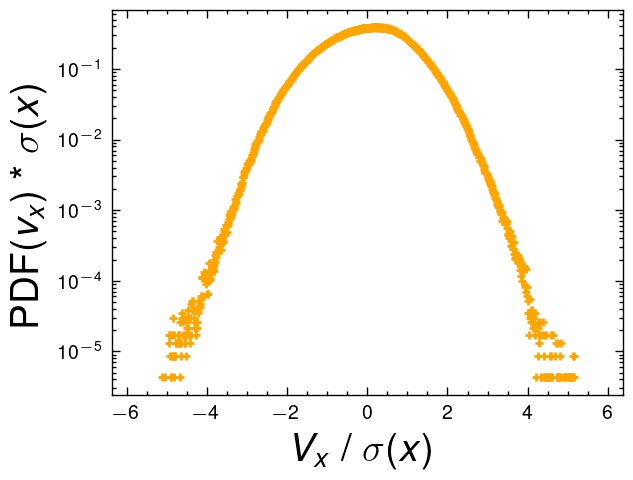

In [16]:
# In log scale
fig = plt.figure()
ax = fig.add_subplot(111)

stat.plot_vx_norm_pdf(y_log=True, ax=ax)

# set font size for the x and y labels
ax.yaxis.get_label().set_fontsize(14)
ax.xaxis.get_label().set_fontsize(14)

# remove title when saving fig
ax.set_title("")
# save fig
plt.savefig("../docs/report/figs/vx_log_pdf_original.eps", bbox_inches="tight", dpi=200)

plt.show()


This is the pdf of the acceleration at coordinate x, of all the dataset

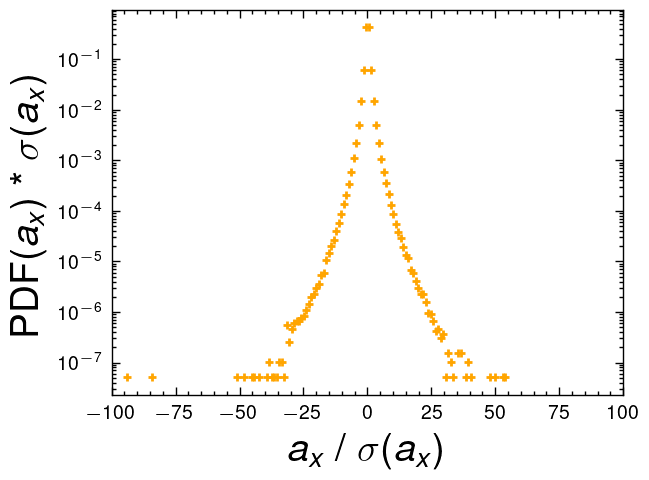

In [22]:
# In log scale
fig = plt.figure()
ax = fig.add_subplot(111)

stat.plot_ax_norm_pdf(y_log=True, ax=ax)

# set font size for the x and y labels
ax.yaxis.get_label().set_fontsize(14)
ax.xaxis.get_label().set_fontsize(14)

# remove title when saving fig
ax.set_title("")
# save fig
plt.savefig("../docs/report/figs/ax_log_pdf_original.eps", bbox_inches="tight", dpi=200)

plt.show()


Text(0.5, 0, 'x / $\\sigma(a_x)$')

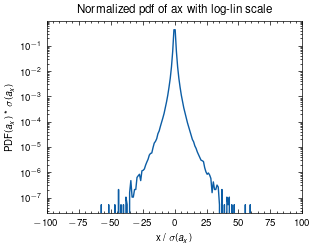

In [8]:
# as a lineplot
from fast_histogram import histogram1d
fig = plt.figure()
ax = fig.add_subplot(111)

a_x = np.gradient(stat.trajectory[:, :, 0], axis=1)
sigma = np.std(a_x.flatten())
hist =  histogram1d(a_x.flatten(), 1000, range=[-20,20])
x_bin, bin_width = np.linspace(-20, 20, num=1000), 40/ 1000
ax.plot(x_bin/sigma, sigma* hist/(bin_width* np.sum(hist)))
ax.set_title("Normalized pdf of ax with log-lin scale")
ax.set_yscale("log")
ax.set_xlim([-100,100])
ax.set_ylabel(r"PDF($a_x$) * $\sigma(a_x)$")
ax.set_xlabel(r"x / $\sigma(a_x)$")


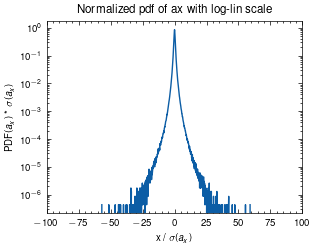

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

a_x = np.gradient(stat.trajectory[:, :, 0], axis=1).flatten()
std = np.std(a_x)
sns.histplot(data=a_x/std, ax=ax, bins=1000, stat="density", element="poly", fill=False)

ax.set_title("Normalized pdf of ax with log-lin scale")
ax.set_yscale("log")
ax.set_xlim([-100,100])
ax.set_ylabel(r"PDF($a_x$) * $\sigma(a_x)$")
ax.set_xlabel(r"x / $\sigma(a_x)$")
plt.show()

The same plot takes 10x times longer than with histogram1d

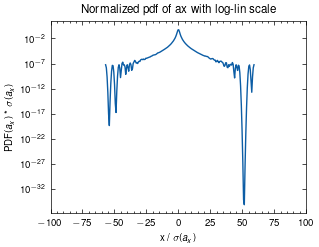

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

std = np.std(a_x.flatten())
sns.kdeplot(data=a_x.flatten()/std, ax=ax, log_scale=(False, True), cut=0, clip=(-100,100), bw_adjust=10)

ax.set_title("Normalized pdf of ax with log-lin scale")
ax.set_yscale("log")
ax.set_xlim([-100,100])
ax.set_ylabel(r"PDF($a_x$) * $\sigma(a_x)$")
ax.set_xlabel(r"x / $\sigma(a_x)$")
plt.show()

As expected, the kde method gives us noisy curves in the extremes.